# 🌿 PlantVillage CNN Classifier
Questo notebook esegue:
- Caricamento dei dati con `ImageDataGenerator`
- Addestramento CNN
- Valutazione delle metriche
- Visualizzazione dei risultati

Assicurati che la struttura delle cartelle sia corretta e che i moduli Python siano nella stessa directory.

In [2]:
from train import train
from evaluate import plot_training, evaluate_model
from utils import plot_class_distribution, plot_confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from collections import Counter
import shutil
import random

# PARAMETRI CONFIGURABILI
data_dir_original = "DataSet/PlantVillage"
data_dir_balanced = "DataSet/PlantVillage_Balanced"
img_size = (224, 224)
batch_size = 32
epochs = 15
use_transfer_learning = True


C:\Users\matte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 📊 Conta immagini per classe nella directory originale

In [3]:
def count_images_per_class(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            count = len([
                f for f in os.listdir(class_dir)
                if f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ])
            class_counts[class_name] = count
    return class_counts

## Bilanciamento delle Classi

In [4]:
def count_images_per_class(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            count = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            class_counts[class_name] = count
    return class_counts

counts = count_images_per_class("DataSet/PlantVillage")
print(counts)

counts = count_images_per_class(data_dir_original)
print("Distribuzione originale:", counts)


{'Pepper__bell___Bacterial_spot': 976, 'Pepper__bell___healthy': 1478, 'Potato___Early_blight': 1000, 'Potato___healthy': 152, 'Potato___Late_blight': 1000, 'Tomato_Bacterial_spot': 2127, 'Tomato_Early_blight': 1000, 'Tomato_healthy': 1591, 'Tomato_Late_blight': 1909, 'Tomato_Leaf_Mold': 952, 'Tomato_Septoria_leaf_spot': 1771, 'Tomato_Spider_mites_Two_spotted_spider_mite': 1676, 'Tomato__Target_Spot': 1404, 'Tomato__Tomato_mosaic_virus': 373, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 3208}
Distribuzione originale: {'Pepper__bell___Bacterial_spot': 976, 'Pepper__bell___healthy': 1478, 'Potato___Early_blight': 1000, 'Potato___healthy': 152, 'Potato___Late_blight': 1000, 'Tomato_Bacterial_spot': 2127, 'Tomato_Early_blight': 1000, 'Tomato_healthy': 1591, 'Tomato_Late_blight': 1909, 'Tomato_Leaf_Mold': 952, 'Tomato_Septoria_leaf_spot': 1771, 'Tomato_Spider_mites_Two_spotted_spider_mite': 1676, 'Tomato__Target_Spot': 1404, 'Tomato__Tomato_mosaic_virus': 373, 'Tomato__Tomato_YellowLeaf__Curl_V

In [5]:
import shutil
import random

def undersample_dataset(original_dir, output_dir, max_per_class=1000):
    os.makedirs(output_dir, exist_ok=True)

    for class_name in os.listdir(original_dir):
        class_dir = os.path.join(original_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
        random.shuffle(images)
        selected_images = images[:max_per_class]

        out_class_dir = os.path.join(output_dir, class_name)
        os.makedirs(out_class_dir, exist_ok=True)

        for img_name in selected_images:
            src = os.path.join(class_dir, img_name)
            dst = os.path.join(out_class_dir, img_name)
            shutil.copy2(src, dst)

    print(f"✅ Dataset ridotto salvato in: {output_dir}")


In [6]:
undersample_dataset(
    original_dir="DataSet/PlantVillage",
    output_dir="DataSet/PlantVillage_Balanced",
    max_per_class=1000
)


✅ Dataset ridotto salvato in: DataSet/PlantVillage_Balanced


## DISTRIBUZIONE CLASSI

Found 16485 images belonging to 15 classes.


c:\Users\matte\Desktop\Progetti Unibo\2 Anno\2 Semestre\AI, Machine Learning\Progetto Classificazione Foglie Aloè_Strazzella\utils.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


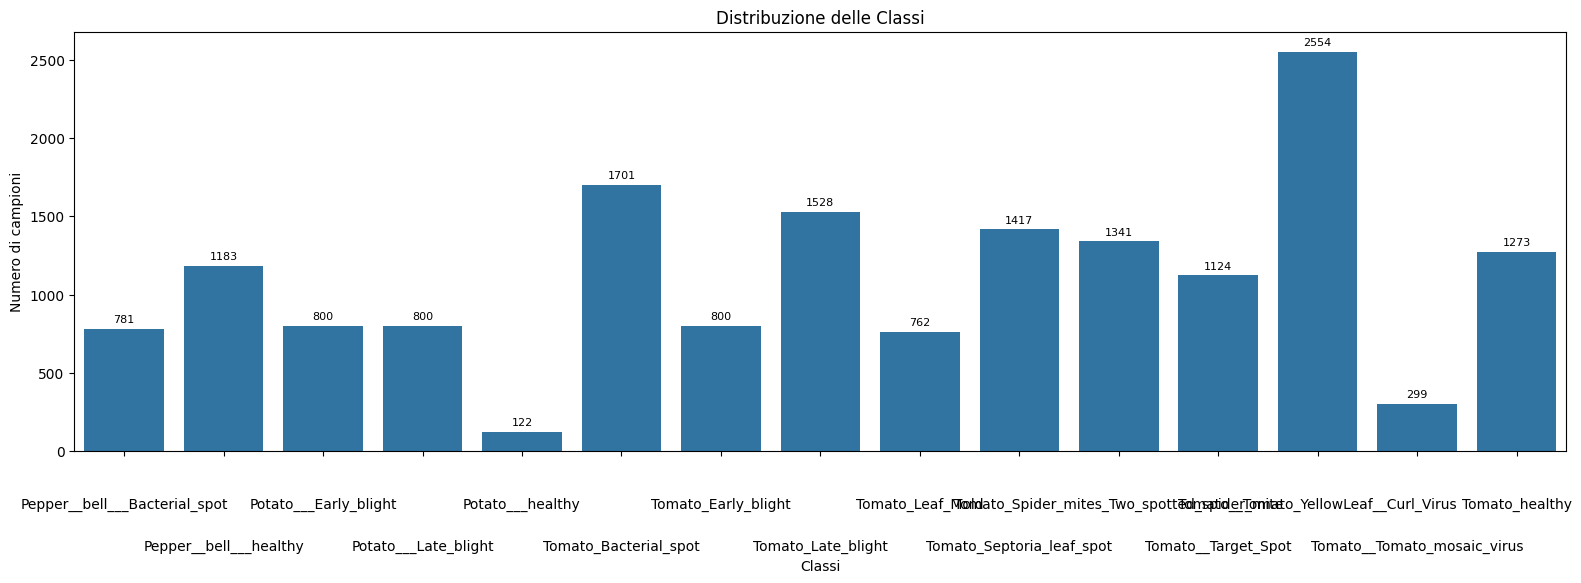

In [7]:
data_dir = "DataSet/PlantVillage_Balanced"  # ✅ Nuova directory bilanciata

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir_balanced,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

plot_class_distribution(train_gen)





## 🏋️ Addestramento del modello

In [ ]:
model, history, val_generator = train(
    data_dir=data_dir_balanced,
    img_size=img_size,
    batch_size=batch_size,
    epochs=epochs,
    use_transfer_learning=use_transfer_learning
)



Found 16485 images belonging to 15 classes.
Found 4115 images belonging to 15 classes.


0epoch [00:00, ?epoch/s]C:\Users\matte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
 13%|█▎        | 2/15 [08:58<1:00:23, 278.72s/epoch, accuracy=0.798, loss=0.631, val_accuracy=0.852, val_loss=0.49]

## 📈 Andamento dell'addestramento

In [ ]:
plot_training(history)


## 🧪 Valutazione del modello

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

evaluate_model(model, val_generator)


## 🔍 Confusion Matrix

In [ ]:
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

plot_confusion_matrix(y_true, y_pred_classes, class_names=class_labels, normalize=True)


## 📊 Distribuzione delle Classi

In [ ]:
plot_class_distribution(val_generator)
